# **<< EDA : 탐색적 데이터 분석 >>**

# **1. 모듈 호출**

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. 데이터(학습/평가) 분리
from sklearn.model_selection import train_test_split

# 2. 피처 엔지니어링
# 오버샘플링 --> 타겟 데이터 불균형 해결을 위한
from imblearn.over_sampling import SMOTE
# 정규화 --> 연속형 피처 불균형 해결을 위한
from sklearn.preprocessing import StandardScaler
# 범주형 변수 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

# **2. 데이터 로드(Data Loading)**

In [71]:
Bankruptcy_org_df = pd.read_csv('data.csv')

In [72]:
print('Bankruptcy 데이터 세트 크기 :\n', 
      '(1) row 갯수 :', Bankruptcy_org_df.shape[0], '\n',
      '(2) features 갯수 :', Bankruptcy_org_df.shape[1])


# 모든 컬럼을 보디 위한 설정
pd.set_option('display.max_columns', None)

Bankruptcy_org_df = pd.read_csv('data.csv')
Bankruptcy_org_df.tail(1)

Bankruptcy 데이터 세트 크기 :
 (1) row 갯수 : 6819 
 (2) features 갯수 : 96


Bankrupt?   ROA(C) before interest and depreciation before interest  \
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6818                 0.99808                    0.801987   

       After-tax net Interest Rate  \
6818                        0.8138   

       Non-industry income and expenditure/revenue  \
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
6818                               0.786079                 0.001432   

       Research and development expense rate   Cash flow rate  \
6818                                     0.0         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
6818                           590000000.0            0.0   

       Net Value Per Share (B)   Net Value Per Share (A)  \
6818                  0.220766                  0.220766   

       Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
6818                  0.220766                                  0.227758   

       Cash Flow Per Share   Revenue Per Share (Yuan ¥)  \
6818              0.305793                     0.000665   

       Operating Profit Per Share (Yuan ¥)  \
6818                              0.092501   

       Per Share Net profit before tax (Yuan ¥)  \
6818                                   0.182119   

       Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
6818                                  0.025316                       0.848053   

       After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
6818                           0.689527                         0.689527   

       Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
6818                            0.217605              9.350000e+09   

       Net Value Growth Rate   Total Asset Return Growth Rate Ratio  \
6818                0.000519                               0.264186   

       Cash Reinvestment %   Current Ratio   Quick Ratio  \
6818              0.360102        0.051348      0.040897   

       Interest Expense Ratio   Total debt/Total net worth   Debt ratio %  \
6818                 0.630618                     0.000461       0.014149   

       Net worth/Assets   Long-term fund suitability ratio (A)  \
6818           0.985851                               0.058476   

       Borrowing dependency   Contingent liabilities/Net worth  \
6818               0.370049                           0.006368   

       Operating profit/Paid-in capital  \
6818                           0.092465   

       Net profit before tax/Paid-in capital  \
6818                                0.179911   

       Inventory and accounts receivable/Net value   Total Asset Turnover  \
6818                                      0.393883               0.002999   

       Accounts Receivable Turnover   Average Collection Days  \
6818                       0.000325                  0.019474   

       Inventory Turnover Rate (times)   Fixed Assets Turnover Frequency  \
6818                        19100000.0                            0.0003   

       Net Worth Turnover Rate (times)   Revenue per person  \
6818                          0.009194             0.002097   

       Operating profit per person   Allocation rate per person  \
6818                      0.385767                     0.000963   

       Working Capital to Total Assets   Quick Assets/Total Assets  \
6818                          0.873759                    0.527136   

       Current Assets/Total Assets   Cash

# **3. 통계적 특성 탐색(Statistical Characteristics Exploration)**

### **1) 데이터 타입 및 결측지 확인**

In [73]:
Bankruptcy_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [74]:
# 결측치 계산
[print(col) for col in Bankruptcy_org_df if Bankruptcy_org_df[col].isna().sum() > 0]

[]

### **2) 데이터 중복 확인**

In [75]:
print("duplicated records :", Bankruptcy_org_df.duplicated().sum())

duplicated records : 0


### **3) 데이터 요약통계량**

In [76]:
pd.set_option('display.max_columns', None)
Bankruptcy_org_df.describe().style.background_gradient()

In [90]:
Bankruptcy_org_df['Total assets to GNP price'].sort_values()

1684    0.000000e+00
6228    1.015558e-04
3083    1.036447e-04
5012    1.068158e-04
3832    1.082951e-04
            ...     
3790    8.890000e+09
5228    9.170000e+09
5031    9.390000e+09
3386    9.650000e+09
1679    9.820000e+09
Name: Total assets to GNP price, Length: 6819, dtype: float64

# **4. 범주형과 연속형 변수 나누기**

In [78]:
Bankruptcy_org_df.columns.tolist()

# 컬럼명 앞에 공백 지우기
Bankruptcy_org_df.columns = Bankruptcy_org_df.columns.str.strip()

In [79]:
# 카테고리형 변수
categorical_vars = ['Liability-Assets Flag', 'Net Income Flag']


# 연속형 변수
continuous_vars = [
    col 
    for col in Bankruptcy_org_df.columns 
    if col not in categorical_vars and col != 'Bankrupt?']


categorical = Bankruptcy_org_df[categorical_vars]
print('범주형 피처의 갯수 : ', categorical.shape[1], '개')

continuous = Bankruptcy_org_df[continuous_vars] 
print('연속형 피처의 갯수 : ', continuous.shape[1], '개')

범주형 피처의 갯수 :  2 개
연속형 피처의 갯수 :  93 개


# ~~**5. 피처 엔지니어링(Feature Engineering)**~~

# **1) 연속형 변수**

### **(1) 이상치 확인 - 박스플롯**

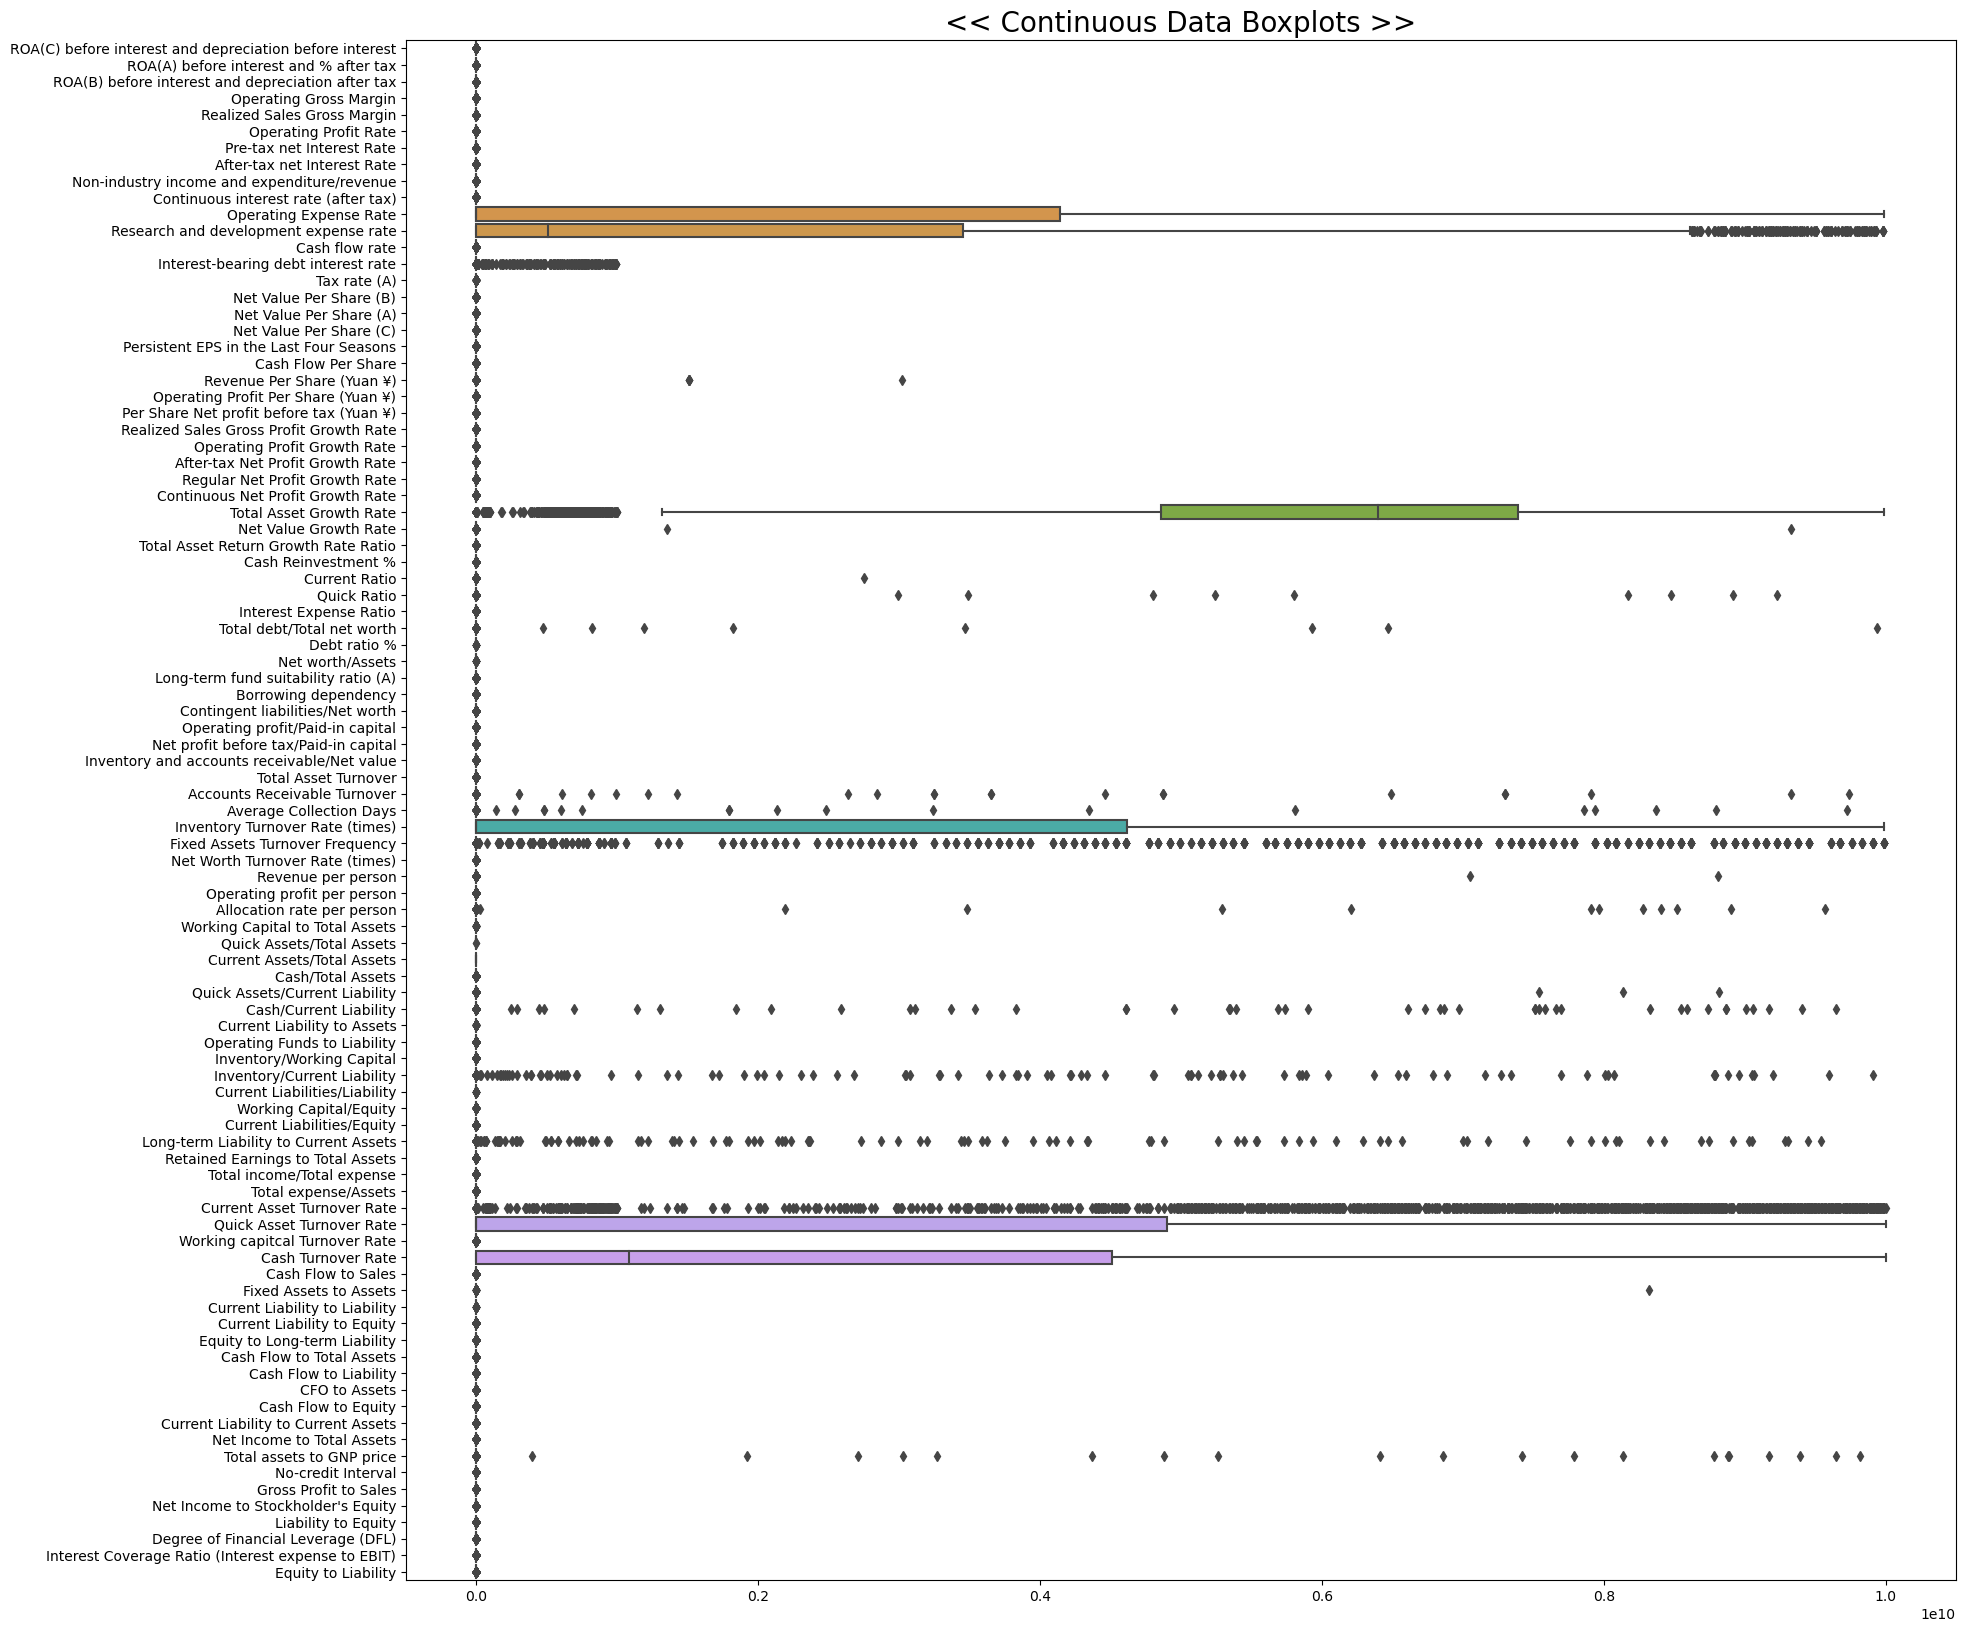

In [91]:
plt.figure(figsize = (20,20))

ax =sns.boxplot(data = continuous, orient="h")
ax.set_title('<< Continuous Data Boxplots >>', fontsize = 20)

# 연속형 변수를 보다 잘 시각화하고 이상치를 확인하기 위한 것
# ax.set(xscale="log")


plt.show()

### **(1-2) 피처엔지니어링1 : 이상치 mean으로 대체 (적용전)**

In [50]:
for col in continuous :
    # Calculate the IQR
    q25, q75 = np.percentile(continuous[col], 25), np.percentile(continuous[col], 75)
    iqr = q75 - q25

    # Define the lower and upper bounds
    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr

    # Replace outliers with mean value
    continuous[col] = np.where((continuous[col] < lower) | (continuous[col] > upper),
                         continuous[col].mean(), continuous[col])

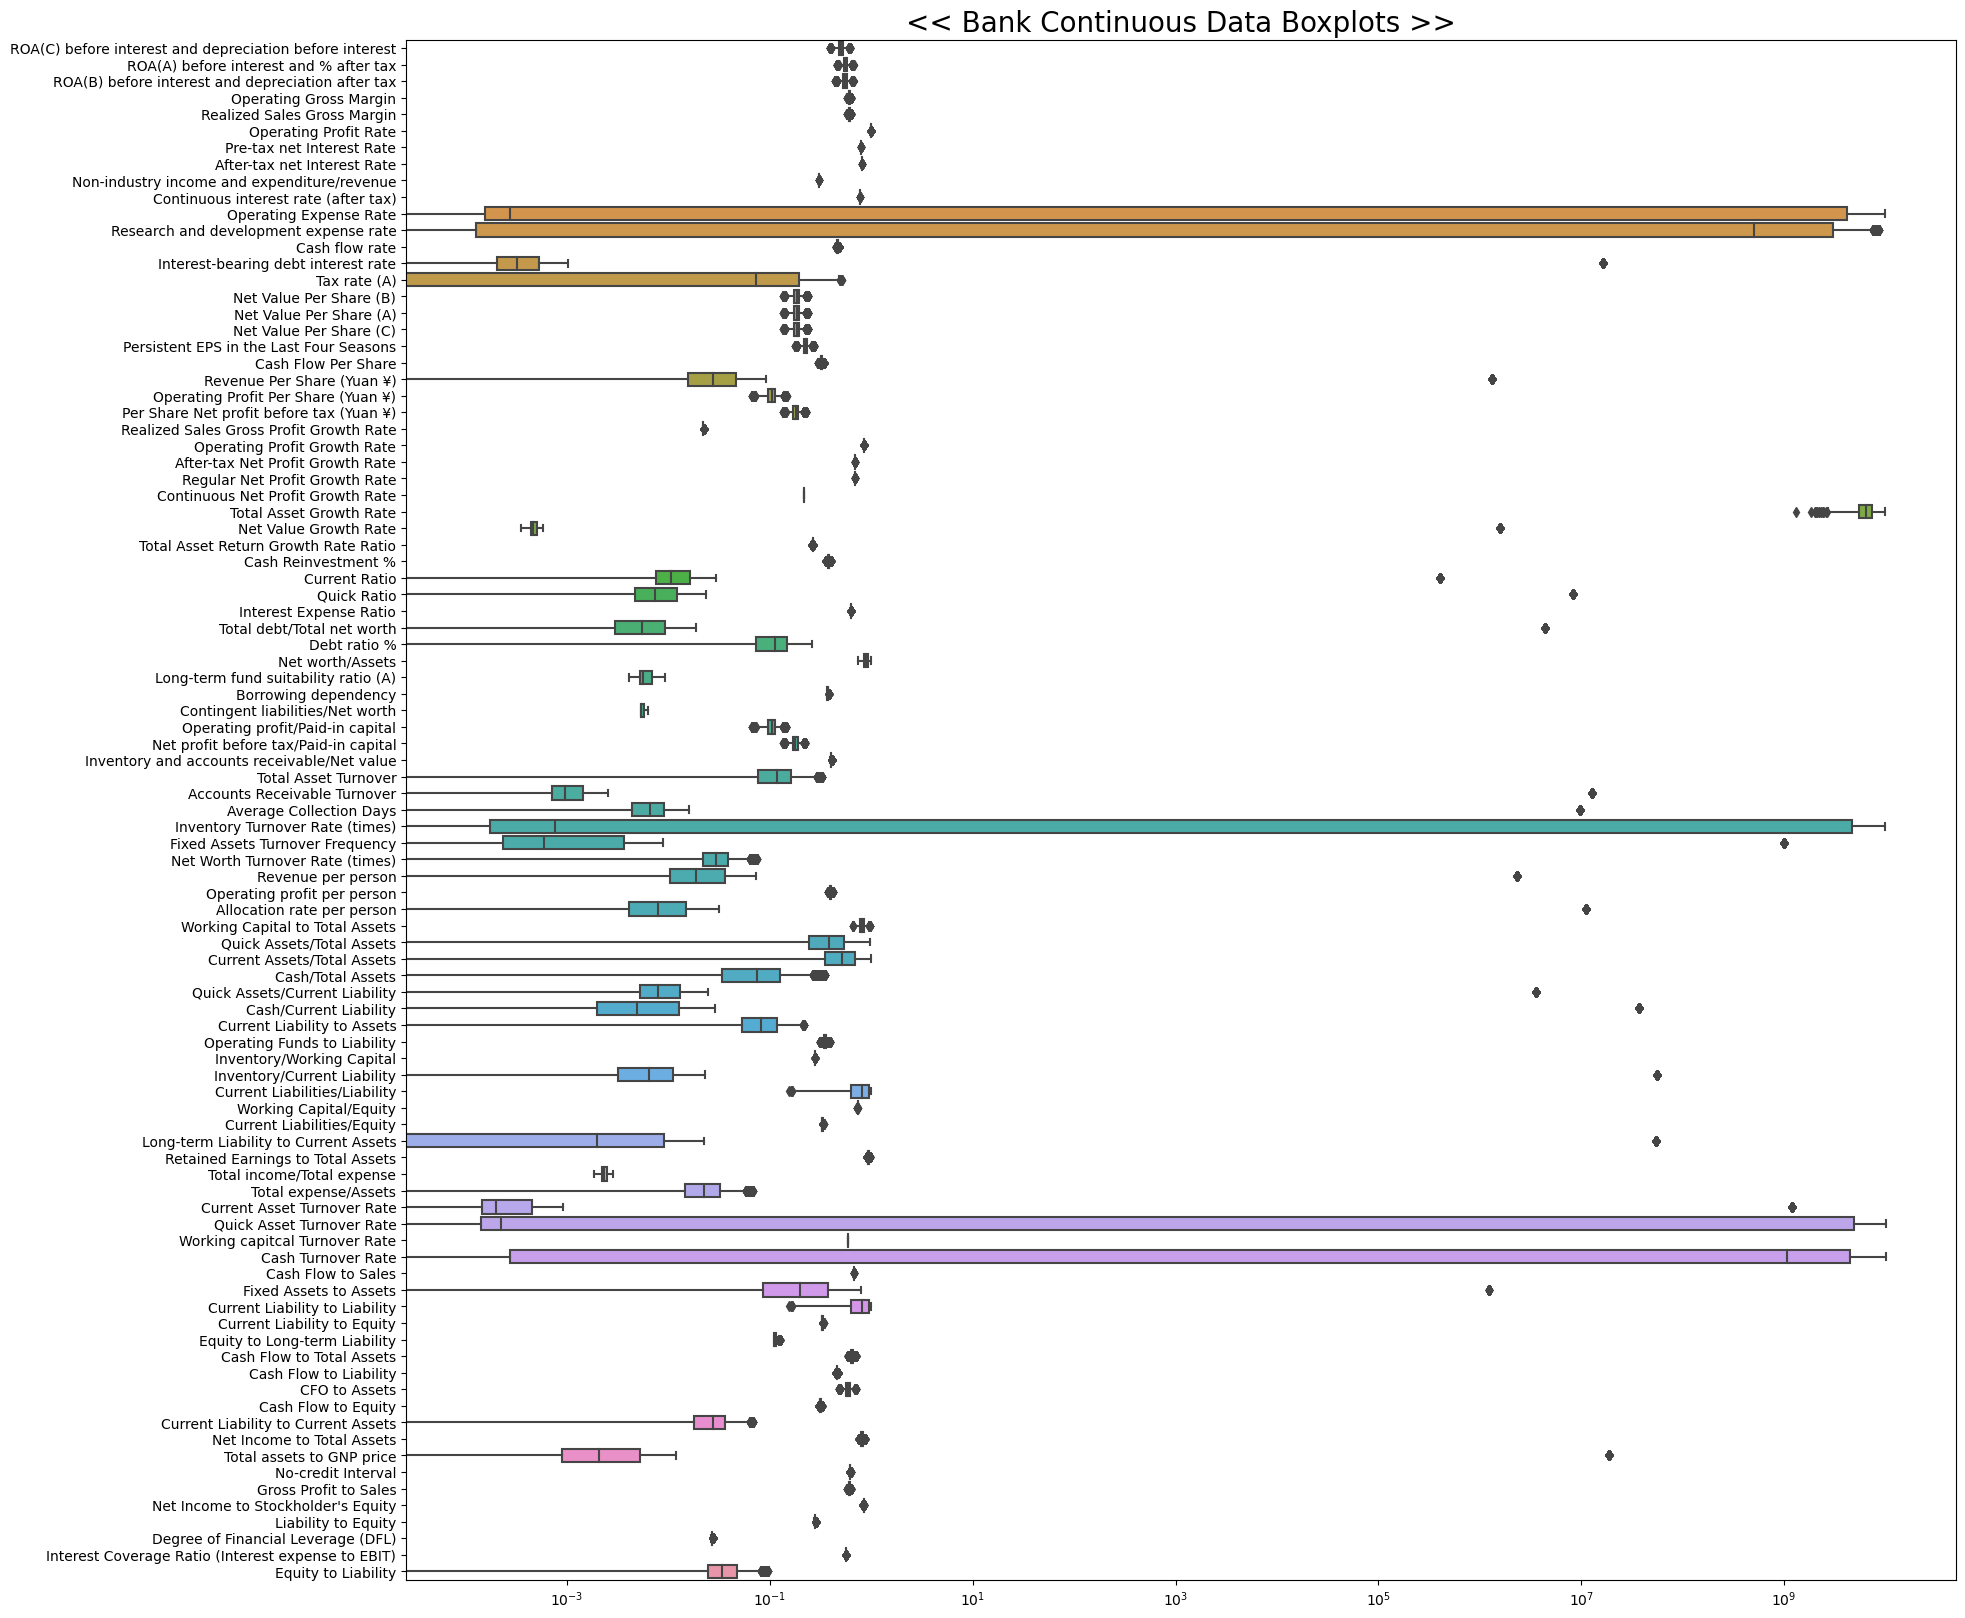

In [45]:
plt.figure(figsize = (20,20))

ax =sns.boxplot(data = continuous, orient="h")
ax.set_title('<< Bank Continuous Data Boxplots >>', fontsize = 20)

# 연속형 변수를 보다 잘 시각화하고 이상치를 확인하기 위한 것
ax.set(xscale="log")


plt.show()

### **(2) 연속형 변수 분포**

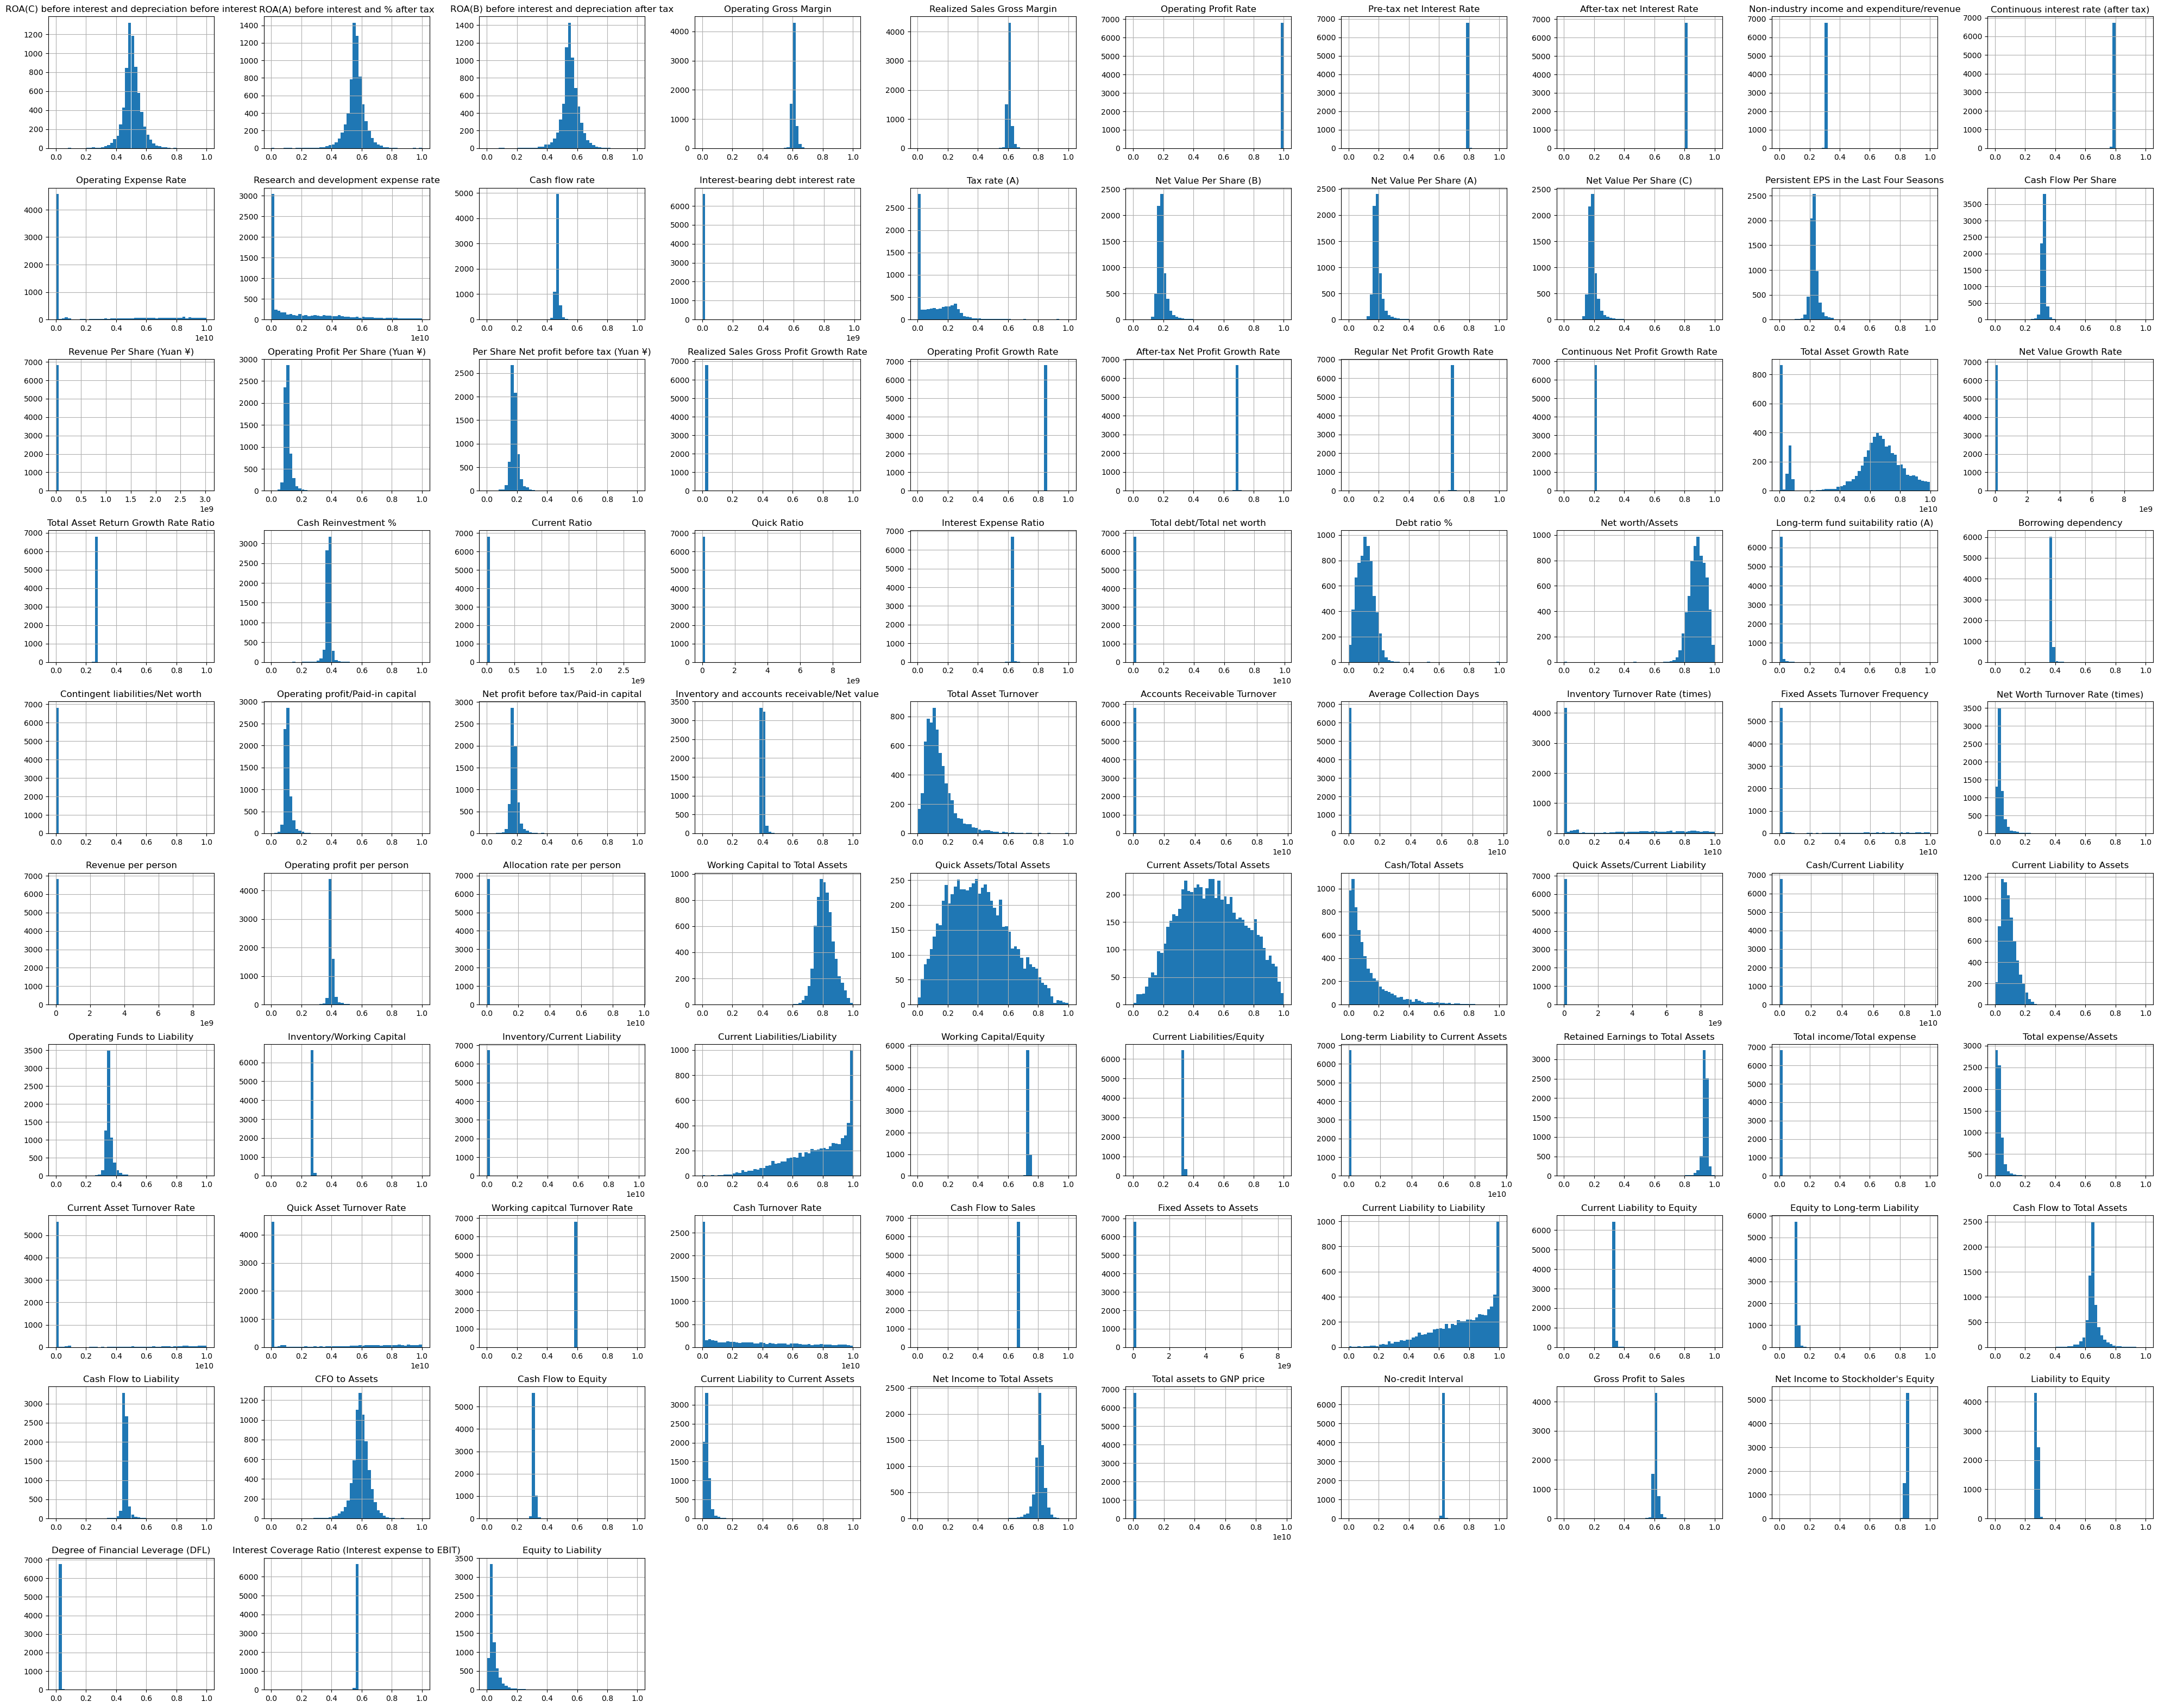

In [94]:
continuous.hist(figsize = (50,40), bins = 50)
plt.show()

### **(2-2) 피처엔지니어링 : 연속형 변수 스케일링 (StandardScaler) 적용전**

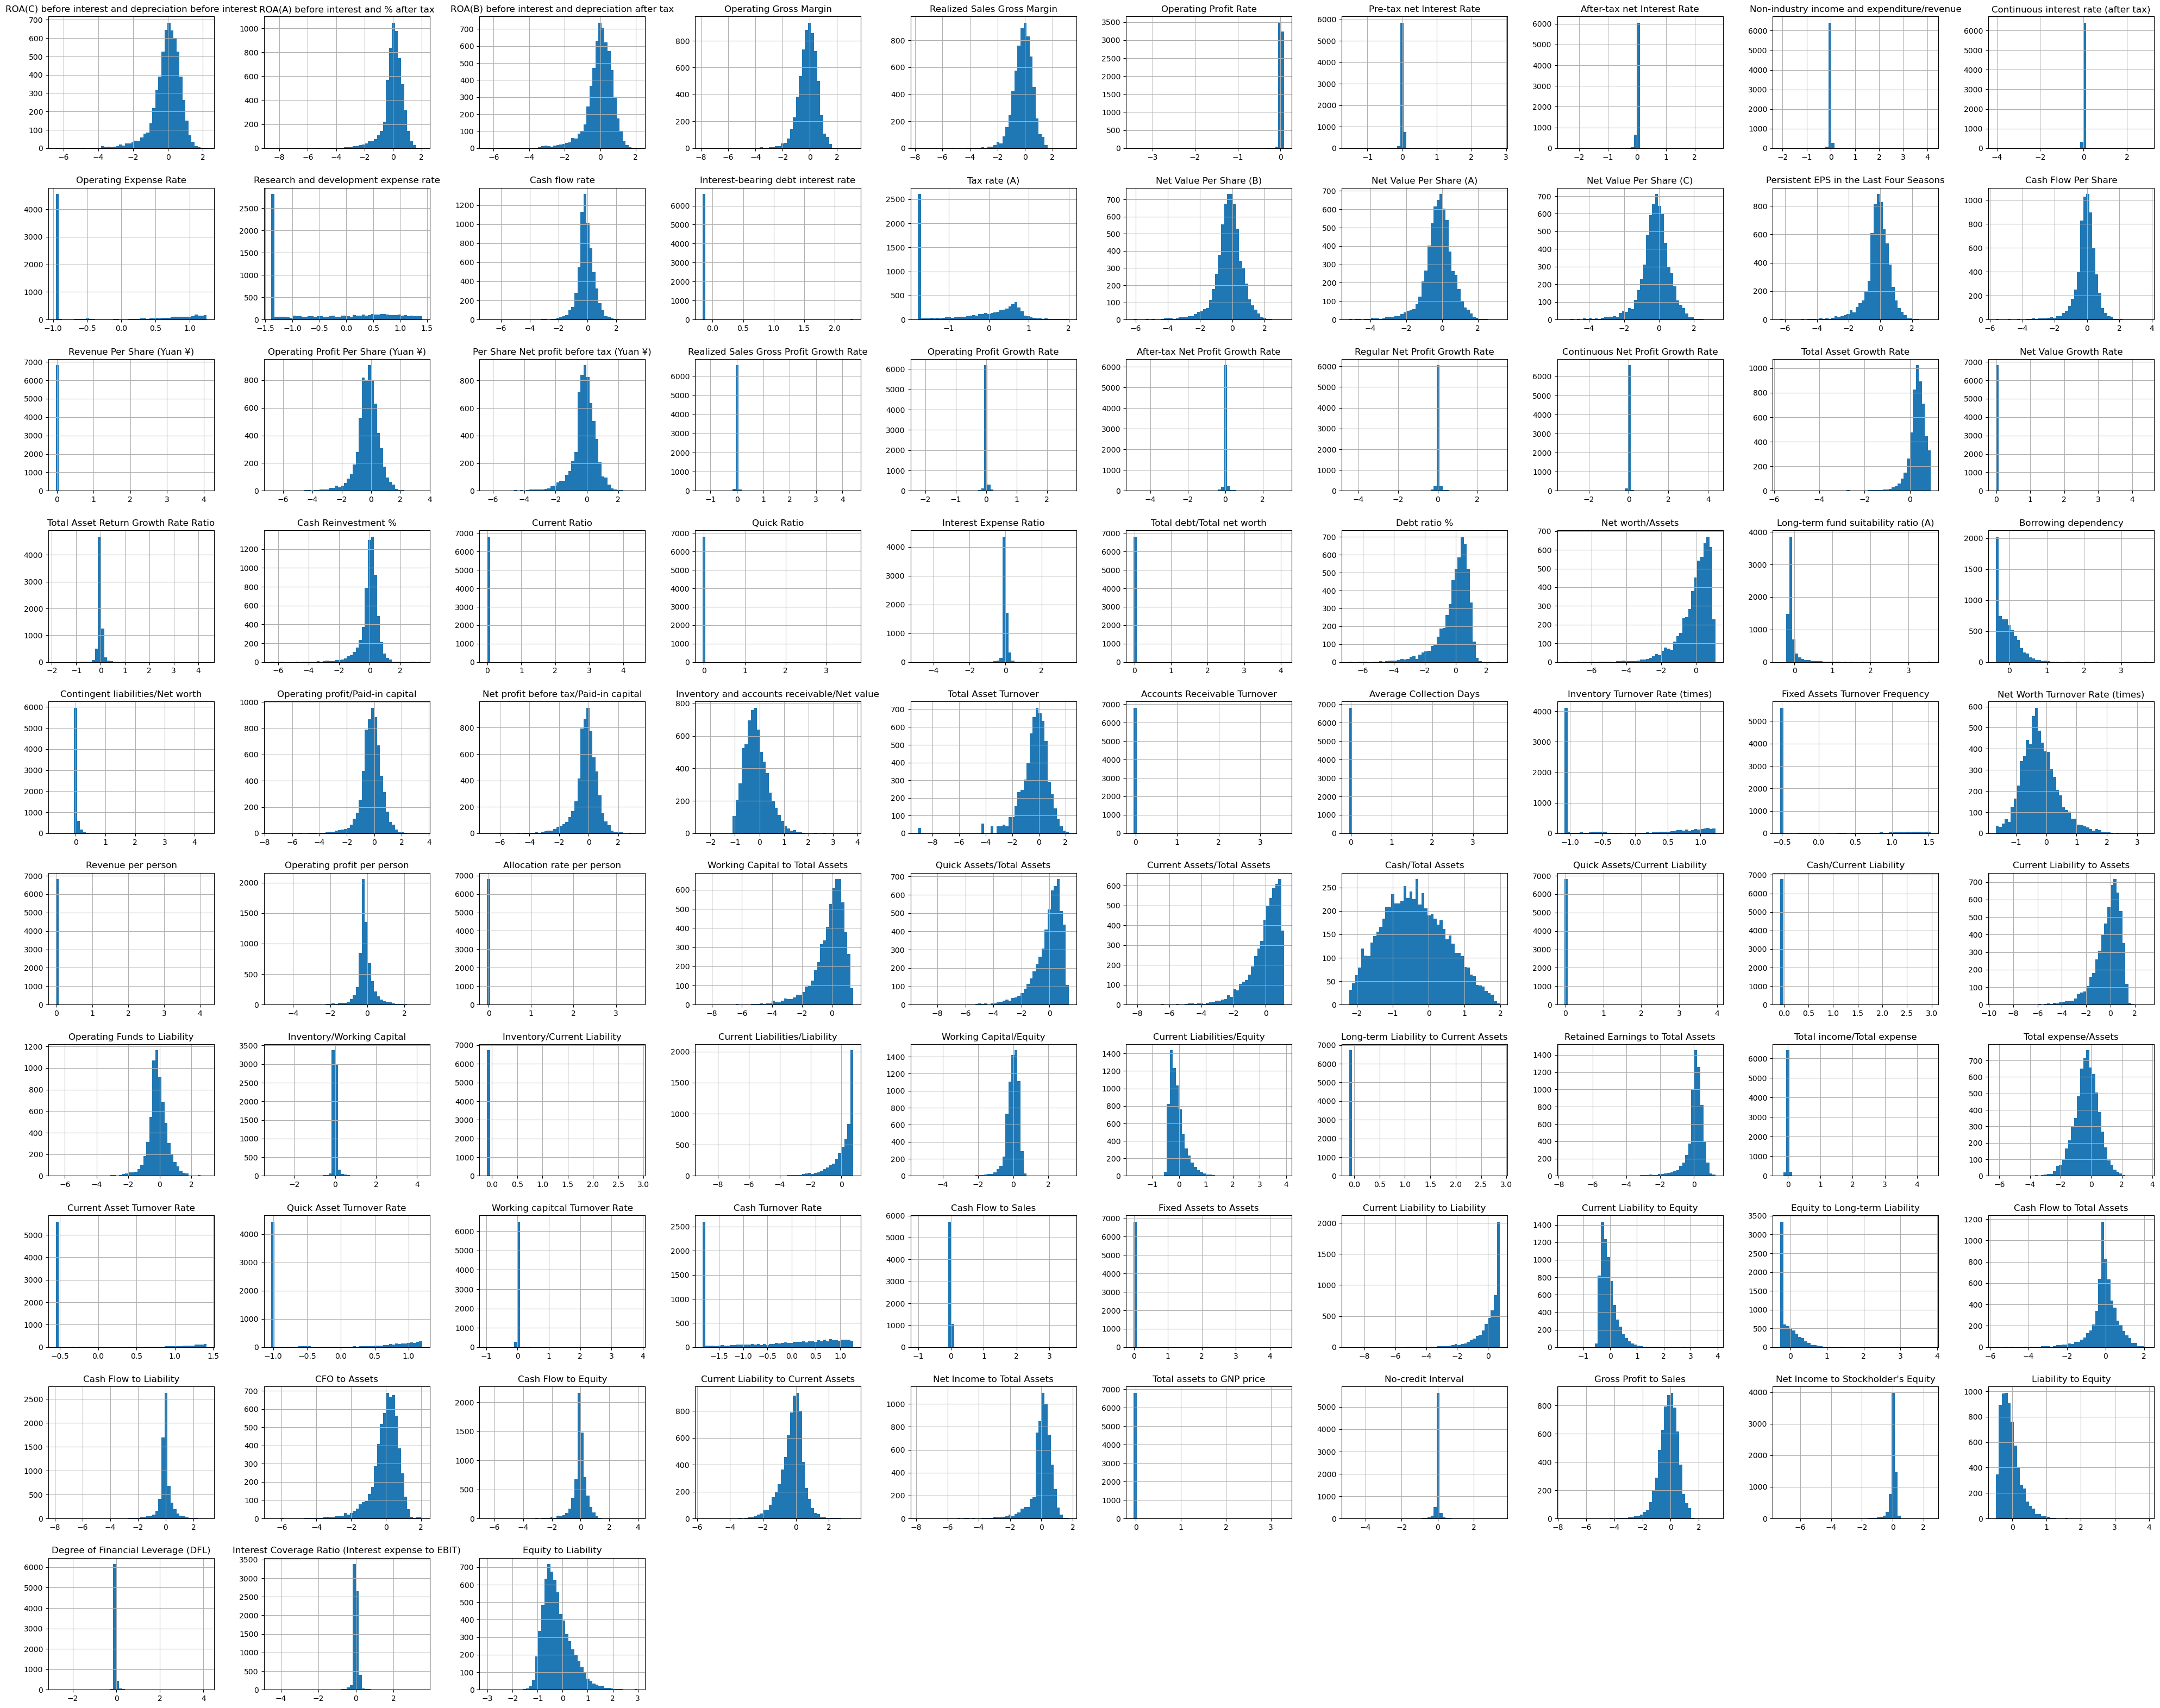

In [93]:
scaler = StandardScaler()

# PowerTransformer를 적용할 변수 선택 및 변환
scaled_cont = scaler.fit_transform(continuous)
# log_scaled_data = np.log1p(scaled_cont)

# 변환된 데이터 확인
log_scaled_continuous = pd.DataFrame(log_scaled_data, columns=continuous.columns)
log_scaled_continuous.hist(figsize = (50,40), bins = 50)
plt.show()

# **2) 범주형 변수**

### **(1) 카테고리형 변수 분포 확인**

In [95]:
# 범주형 변수의 유니크한 값
print('1. 파산 여부', Bankruptcy_org_df['Bankrupt?'].unique())
print('2. 부채가 자산을 초과하는지 여부', Bankruptcy_org_df['Liability-Assets Flag'].unique())
print('3. 2년 동안 순이익이 음수인지 여부', Bankruptcy_org_df['Net Income Flag'].unique())


print('\n범주형 변수가 이미 이진 분류되어 있기 때문에 원핫인코딩을 따로 진행하지 않음')

1. 파산 여부 [1 0]
2. 부채가 자산을 초과하는지 여부 [0 1]
3. 2년 동안 순이익이 음수인지 여부 [1]

범주형 변수가 이미 이진 분류되어 있기 때문에 원핫인코딩을 따로 진행하지 않음


### **(1-2) 피처엔지니어링3 : Liability-Assets Flag 원 핫 인코딩 (적용전)**

In [34]:
# ohe = OneHotEncoder(sparse=False, dtype=int)
# ohe_cat= ohe.fit_transform(Bankruptcy_org_df[['Liability-Assets Flag']])

# categorical_data = pd.DataFrame(ohe_cat)
# categorical_data = pd.concat([Bankruptcy_org_df, categorical_data], axis=1)

# new_columns = {0: 'Liability-Assets Flag_0', 1: 'Liability-Assets Flag_1'}
# Bankruptcy_new_df = categorical_data.rename(columns=new_columns)

# **6. 훈련 및 시험 데이터 분리**

In [96]:
# 타겟 및 피처 변수 만들기
y_target = Bankruptcy_org_df['Bankrupt?']
X_features = Bankruptcy_org_df.drop(columns=['Bankrupt?'], axis=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

In [98]:
# 타겟값 확인
print('y_target 의 shape :',  y_target.shape)
print('y_target 의 고유값 :',  y_target.unique())

y_target 의 shape : (6819,)
y_target 의 고유값 : [1 0]


In [99]:
# 피처값 확인
print('X_featues 의 shape :', X_features.shape)
X_features.head(1)

X_featues 의 shape : (6819, 95)


ROA(C) before interest and depreciation before interest  \
0                                           0.370594         

   ROA(A) before interest and % after tax  \
0                                0.424389   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                            0.40575                0.601457   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985                0.000126   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                  0.14795   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                  0.14795                  0.14795   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   

   Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
0                     0.01756                             0.095921   

   Per Share Net profit before tax (Yuan ¥)  \
0                                  0.138736   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                 0.022102                      0.848195   

   After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
0                          0.688979                        0.688979   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                           0.217535             4.980000e+09   

   Net Value Growth Rate  Total Asset Return Growth Rate Ratio  \
0               0.000327                                0.2631   

   Cash Reinvestment %  Current Ratio  Quick Ratio  Interest Expense Ratio  \
0             0.363725       0.002259     0.001208                0.629951   

   Total debt/Total net worth  Debt ratio %  Net worth/Assets  \
0                    0.021266      0.207576          0.792424   

   Long-term fund suitability ratio (A)  Borrowing dependency  \
0                              0.005024              0.390284   

   Contingent liabilities/Net worth  Operating profit/Paid-in capital  \
0                          0.006479                          0.095885   

   Net profit before tax/Paid-in capital  \
0                               0.137757   

   Inventory and accounts receivable/Net value  Total Asset Turnover  \
0                                     0.398036              0.086957   

   Accounts Receivable Turnover  Average Collection Days  \
0                      0.001814                 0.003487   

   Inventory Turnover Rate (times)  Fixed Assets Turnover Frequency  \
0                         0.000182                         0.000117   

   Net Worth Turnover Rate (times)  Revenue per person  \
0                         0.032903            0.034164   

   Operating profit per person  Allocation rate per person  \
0                     0.392913                    0.037135   

   Working Capital to Total Assets  Quick Assets/Total Assets  \
0                         0.672775                   0.166673   

   Current Assets/Total Assets  Cash/Total Assets  \
0                     0.190643           0.004094   

   Quick Assets/Current Liability  Cash/Current Liability  \
0                        0.001997                0.000147   

   Current Liability to Assets  Operating Funds to Liability  \
0                     0.147308                      0.334015   

   Inventory/Working Capital  

In [100]:
print('학습용 피처의 Shape :', X_train.shape)
print('시험용 피처의 Shape :', X_test.shape)
print('학습용 라벨의 Shape :', y_train.shape)
print('시험용 라벨의 Shape :', y_test.shape)

학습용 피처의 Shape : (5455, 95)
시험용 피처의 Shape : (1364, 95)
학습용 라벨의 Shape : (5455,)
시험용 라벨의 Shape : (1364,)


# **7. 데이터 시각화 (Data Visualization)**

# **1) 타겟변수와 범주형 변수**

### **(1) Liability-Assets Flag : 총 자산과 파산의 관계**
- 총 자산이 부채보다 클 경우 파산하지 않을까?

- **<1. 부채-자산 플래그>** 
- : 총 부채 > 총 자산 : 1
- : 총 부채 < 총 자산 : 0
- 대부분의 경우, 기업의 자산은 부채보다 많다.

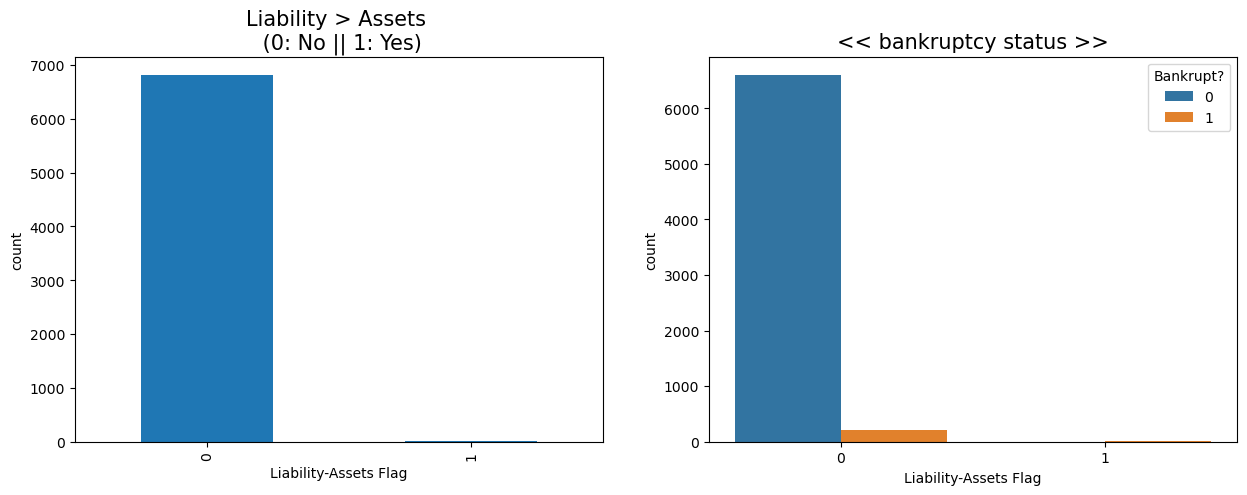

<< 부채보다 자산을 많이 보유하고 있음에도 불구하고 조직의 일부가 파산을 겪음. >>
--------------------------------------------------
1) 순이익 플래그 :
 0    6811
1       8
Name: Liability-Assets Flag, dtype: int64
--------------------------------------------------
2) 손실을 많이 본 기업이 파산했는가? : 
 Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1 = axes[0]
ax2 = axes[1]

# 부채-자산 플래그 시각화
feature_counts_1 = Bankruptcy_org_df['Liability-Assets Flag'].value_counts()
feature_counts_1.plot(kind='bar', ax=ax1)
ax1.set_title('Liability > Assets \n (0: No || 1: Yes)', fontsize=15)
ax1.set_xlabel('Liability-Assets Flag')
ax1.set_ylabel("count")


# 부채-자산 플래그와 파산의 관계 시각화
sns.countplot(x = 'Liability-Assets Flag', hue = 'Bankrupt?', data = Bankruptcy_org_df)
ax2.set_xlabel('Liability-Assets Flag')
ax2.set_title('<< bankruptcy status >>', fontsize=15)

plt.show()

print('<< 부채보다 자산을 많이 보유하고 있음에도 불구하고 조직의 일부가 파산을 겪음. >>')
print('-' * 50)


print('1) 순이익 플래그 :\n', Bankruptcy_org_df['Liability-Assets Flag'].value_counts())
print('-' * 50)
print('2) 손실을 많이 본 기업이 파산했는가? : \n', Bankruptcy_org_df[['Liability-Assets Flag','Bankrupt?']].value_counts())

### **(2) Net Income Flag : 기업의 수익성과 파산의 관계**
- 기업의 손실이 크면 파산하지 않을까?

- **<2. 순이익 플래그>**  ---> 기업의 수익성을 평가
- : 음수인 경우 (1) --> 손실 발생
- : 양수인 경우 (0) --> 순이익 발생
- 모든 기업은 손실을 보고 있다.

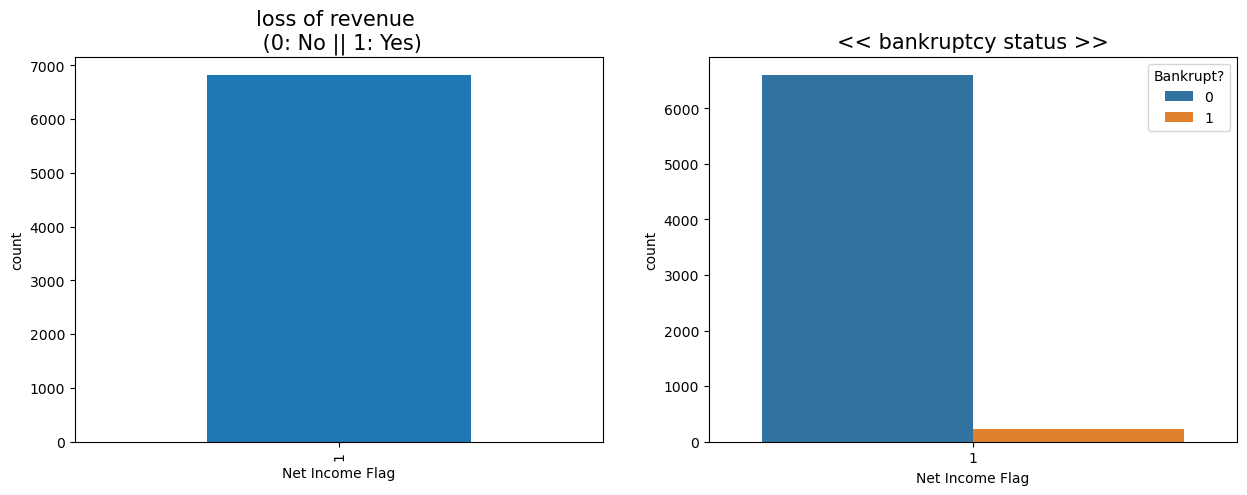

<< 손실을 보고 있던 대부분의 기업들은 사업을 안정화 시켜 파산을 면하였음. >>
--------------------------------------------------
1) 순이익 플래그 :
 1    6819
Name: Net Income Flag, dtype: int64
--------------------------------------------------
2) 손실을 많이 본 기업이 파산했는가? : 
 Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1 = axes[0]
ax2 = axes[1]

# 순이익 플래그 시각화
feature_counts_1 = Bankruptcy_org_df['Net Income Flag'].value_counts()
feature_counts_1.plot(kind='bar', ax=ax1)
ax1.set_title('loss of revenue \n (0: No || 1: Yes)', fontsize=15)
ax1.set_xlabel('Net Income Flag')
ax1.set_ylabel("count")

# 두 번째 변수 시각화
sns.countplot(x = 'Net Income Flag', hue = 'Bankrupt?', data = Bankruptcy_org_df)
ax2.set_title('<< bankruptcy status >>', fontsize=15)

plt.show()

print('<< 손실을 보고 있던 대부분의 기업들은 사업을 안정화 시켜 파산을 면하였음. >>')
print('-' * 50)

print('1) 순이익 플래그 :\n', Bankruptcy_org_df['Net Income Flag'].value_counts())
print('-' * 50)
print('2) 손실을 많이 본 기업이 파산했는가? : \n', Bankruptcy_org_df[['Net Income Flag','Bankrupt?']].value_counts())

# **2) corr 상관분석**

### **(1) 연속형 피처간의 상관관계**

In [113]:
continuous_corr_matrix = continuous.corr()

high_corr_values = continuous_corr_matrix[(continuous_corr_matrix >= 0.8) | (continuous_corr_matrix <= -0.8)]
high_corr_values = high_corr_values.replace(np.nan, '', regex=True)

print(high_corr_values)

                                                   ROA(C) before interest and depreciation before interest  \
ROA(C) before interest and depreciation before ...                                                1.0        
ROA(A) before interest and % after tax                                                       0.940124        
ROA(B) before interest and depreciation after tax                                            0.986849        
Operating Gross Margin                                                                                       
Realized Sales Gross Margin                                                                                  
...                                                                                               ...        
Net Income to Stockholder's Equity                                                                           
Liability to Equity                                                                                          
Degree of 

### **(2) 타겟변수와 연속형 피처의 상관관계**

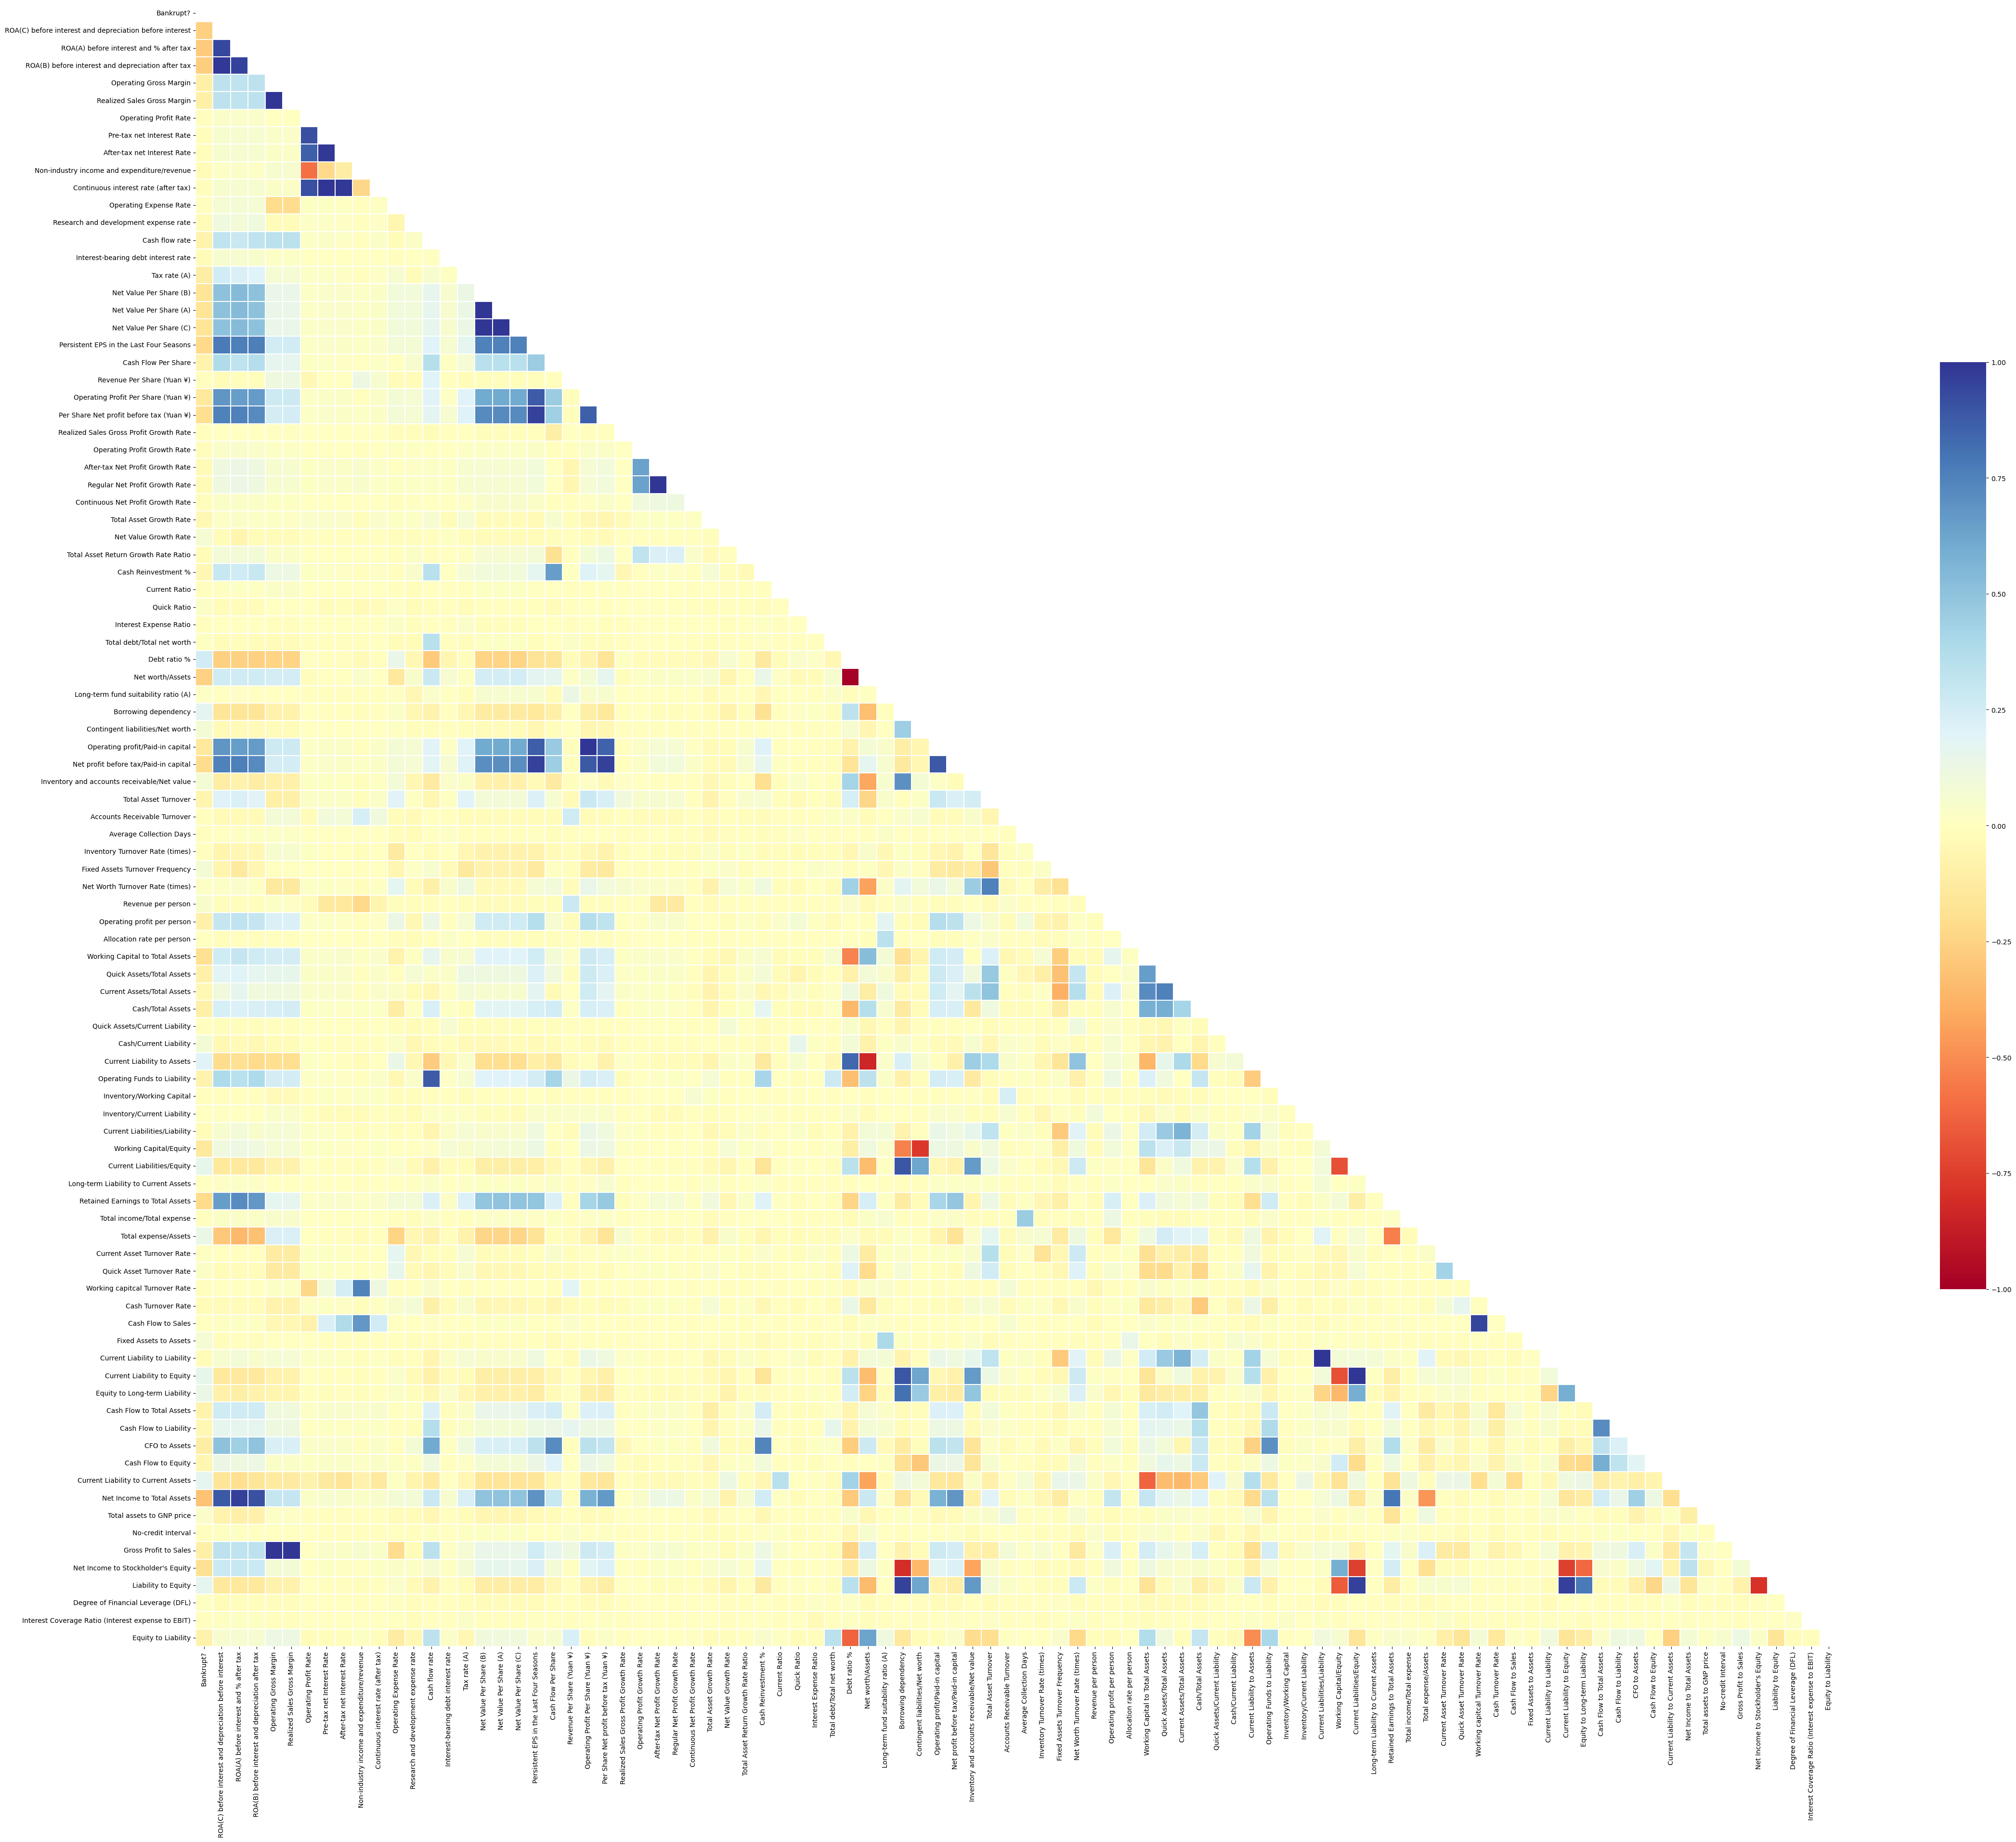

In [114]:
# 범주형 변수를 제외한 연속형변수와 타겟 변수간 상관관계
corr_matrix = Bankruptcy_org_df.drop(columns=categorical).corr()

fig, ax = plt.subplots(figsize=(55, 50))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data=corr_matrix, ax=ax, mask=mask, linewidth = 0.1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap='RdYlBu')

plt.show()

### **(3) 타겟변수와 연속형 변수 관계 시각화**

In [163]:
print('Bankrupt? --> 0 : ', Bankruptcy_org_df['Bankrupt?'].value_counts()[0], '건  -> 파산하지 않은 경우')
print('Bankrupt? -> No :', round(Bankruptcy_org_df['Bankrupt?'].value_counts()[0] / len(Bankruptcy_org_df) * 100, 2), '%')

print('-' * 50)

print('Bankrupt? --> 1 : ', Bankruptcy_org_df['Bankrupt?'].value_counts()[1], '건  -> 파산한 경우')
print('Bankrupt? -> Yes :', round(Bankruptcy_org_df['Bankrupt?'].value_counts()[1] / len(Bankruptcy_org_df) * 100, 2), '%')

Bankrupt? --> 0 :  6599 건  -> 파산하지 않은 경우
Bankrupt? -> No : 96.77 %
--------------------------------------------------
Bankrupt? --> 1 :  220 건  -> 파산한 경우
Bankrupt? -> Yes : 3.23 %


# **3) 타겟변수와 연속형 변수간의 관계**

In [148]:
cont_df = Bankruptcy_org_df.drop(['Liability-Assets Flag', 'Net Income Flag', 'Bankrupt?'], axis=1)
# cont_df

In [149]:
positive_corr = cont_df.corrwith(Bankruptcy_org_df["Bankrupt?"]).sort_values(ascending=False)[:15].index.tolist()
positive_corr = Bankruptcy_org_df[positive_corr + ["Bankrupt?"]].copy()

negative_corr = cont_df.corrwith(Bankruptcy_org_df["Bankrupt?"]).sort_values()[:15].index.tolist()
negative_corr = Bankruptcy_org_df[negative_corr + ["Bankrupt?"]].copy()

#### **(1) 양의 상관관계가 가장 높은 상위 15개의 피처**

In [150]:
p_X_value = positive_corr.columns.tolist()[-1]  # 타겟열
p_y_value = positive_corr.columns.tolist()[:-1] # 타겟값제외 연속형 피처열

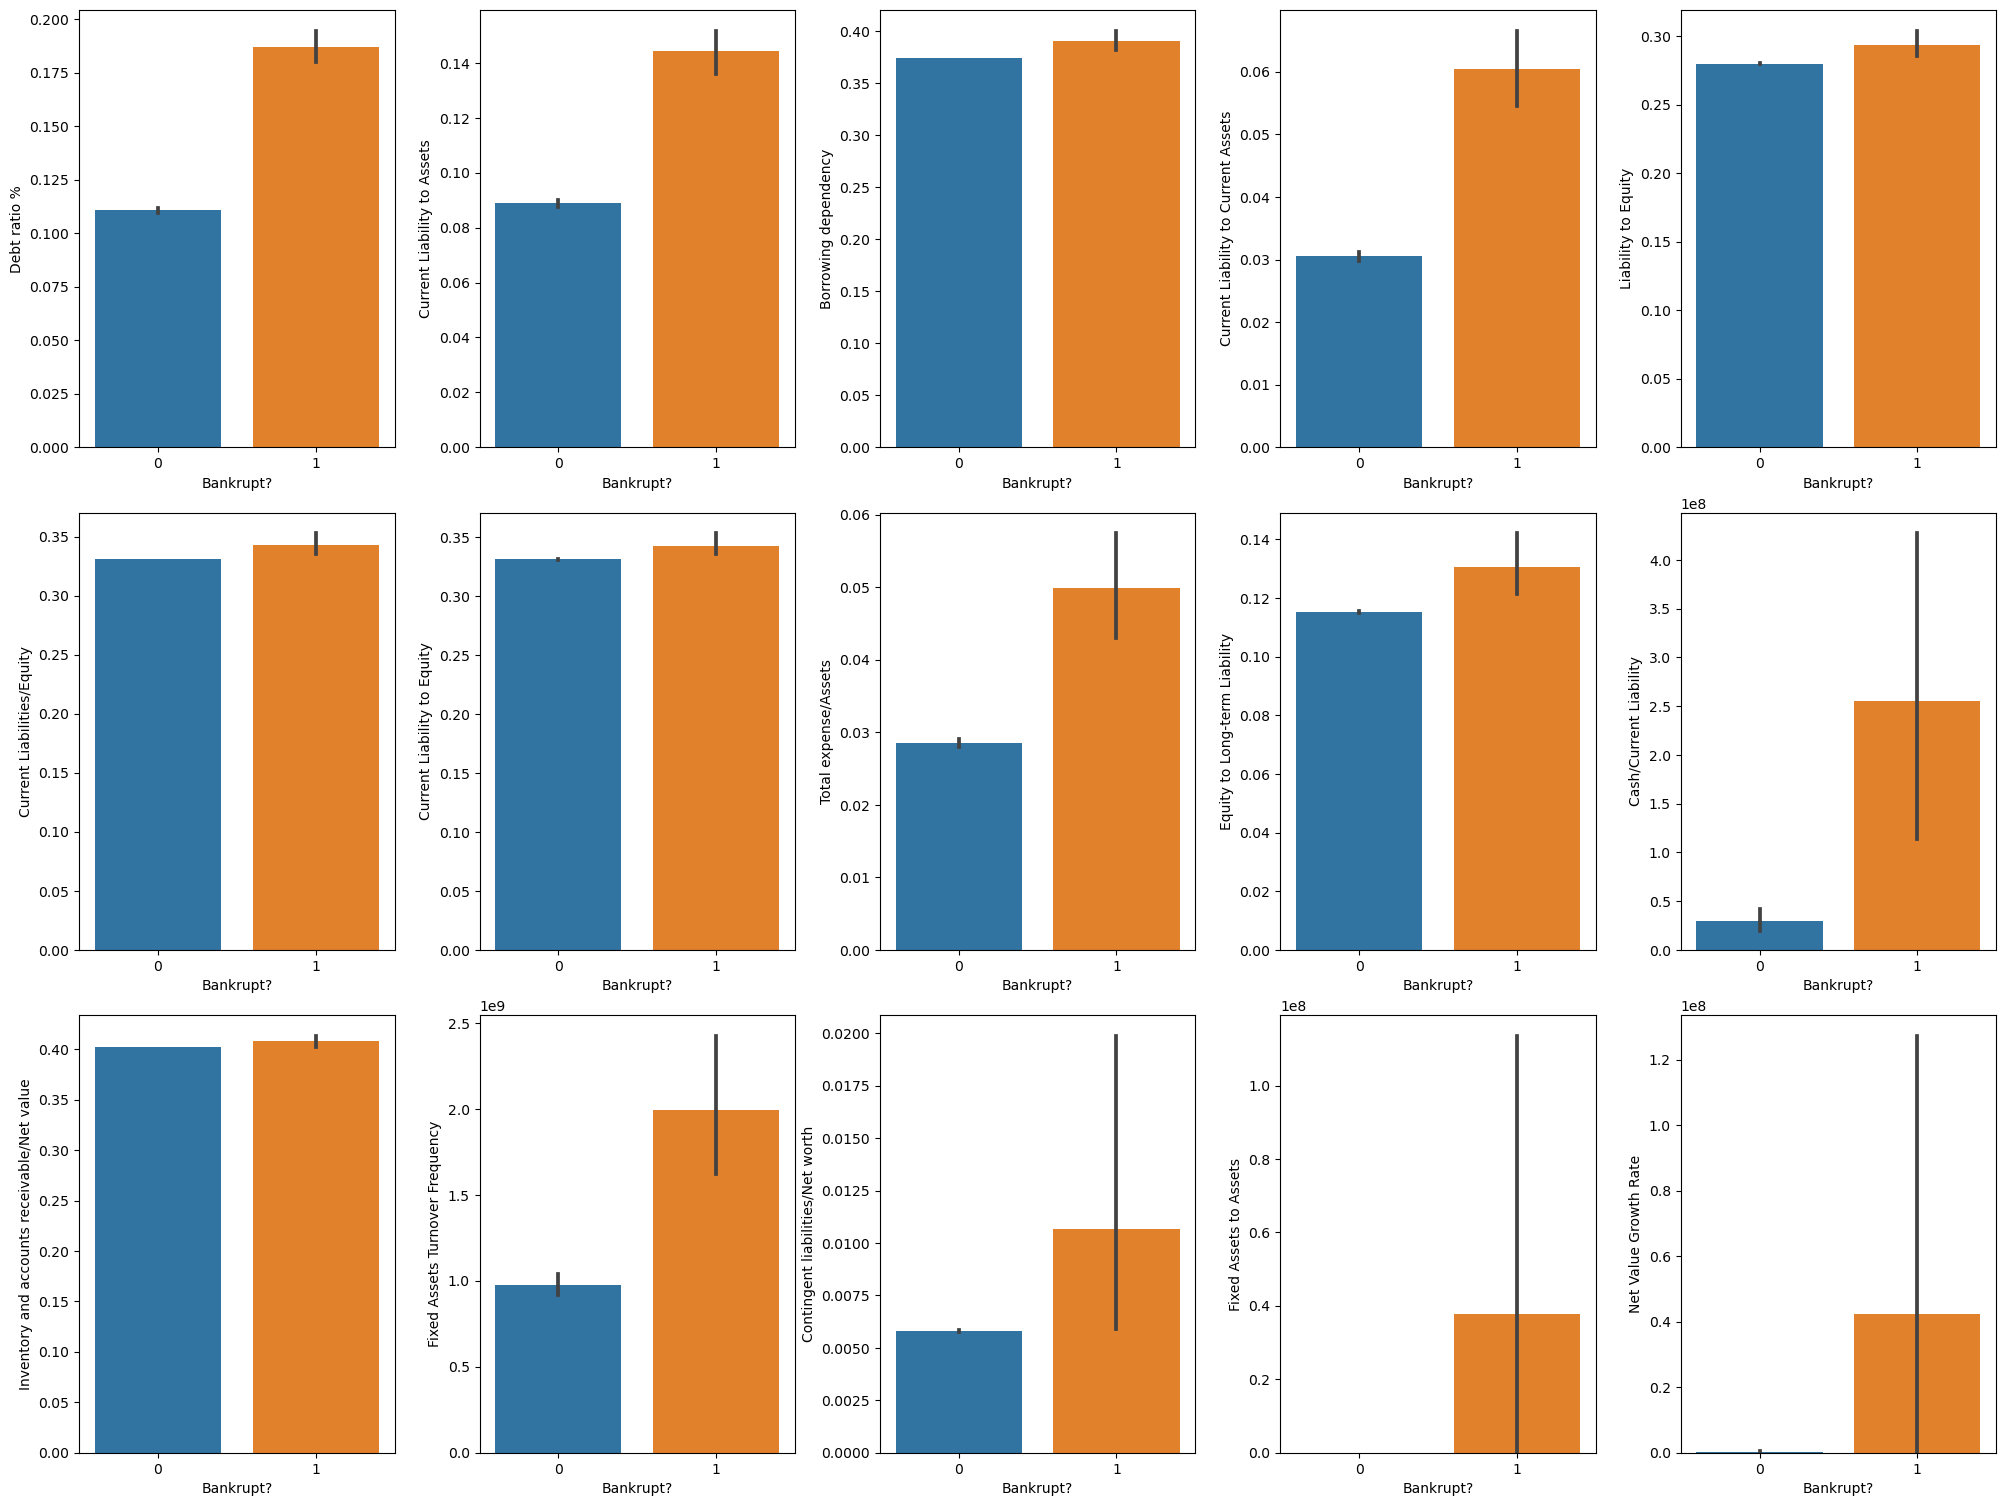

In [151]:
plt.figure(figsize=(20, 15))

for i in range(1, 16):
    plt.subplot(3, 5, i)  
    sns.barplot(x=p_X_value, y=p_y_value[i-1], data=positive_corr)

plt.tight_layout(pad=0.5)

In [157]:
# 타겟 변수와 양의 상관관계가 가장 높은 피처 Top15
p_y_value

['Debt ratio %',
 'Current Liability to Assets',
 'Borrowing dependency',
 'Current Liability to Current Assets',
 'Liability to Equity',
 'Current Liabilities/Equity',
 'Current Liability to Equity',
 'Total expense/Assets',
 'Equity to Long-term Liability',
 'Cash/Current Liability',
 'Inventory and accounts receivable/Net value',
 'Fixed Assets Turnover Frequency',
 'Contingent liabilities/Net worth',
 'Fixed Assets to Assets',
 'Net Value Growth Rate']

### **<양의 상관관계 시각화 해석>**
- 부채 비율 % : 부채/총자산 --> 부채가 총자산에 비해 큰 비중을 차지할 수록 
- 자산유동 부채 --> 유기업이 현재의 자산을 유지하거나 변동에 대응하기 위해 충분한 유동 자금을 보유하지 못하고 있음 
- 차입의존성: 이자부부채비용  --> 기업이 이자부채를 상당한 비용으로 부담하고 있음
- 유동 자산에 대한 유동 부채  --> 유동 자산에 비해 높은 유동 부채
- 자기 자본에 대한 부채       --> 자기 자본에 대한 높은 부채
- 유동부채/자본               --> 높은 유동부채 부담
- 유동 부채에서 자본으로       --> 높은 유동부채 비중
- 총비용/자산                 --> 비용 부담이 높다
- 자본에서 장기 부채로         --> 높은 장기 부채 비중
- 현금/유동 부채               --> 현금으로 유동 부채를 상환하는 능력이 높다
- 재고 및 미수금/순가치: (재고+미수금)/자본  --> 기업의 재고와 미수금이 자기 자본에 대해 상대적으로 큰 비중을 차지
- 고정 자산 회전율 빈도         --> 자금 필요성이 크다는 신호
- 우발부채/순자산: 우발부채/자본 -->  높은 우발부채 비중
- 고정 자산에서 자산으로        --> 기업의 자산 대비 부채 비율이 높을 가능성, 부채가 기업의 자산을 초과하거나 상환능력이 부족할 때 크게 증가
- 순가치증가율: 총자산증가율    --> ??

#### **(2) 음의 상관관계가 가장 높은 상위 15개의 피처**

In [158]:
n_X_value = negative_corr.columns.tolist()[-1]  # 타겟열
n_y_value = negative_corr.columns.tolist()[:-1] # 타겟값제외 연속형 피처열

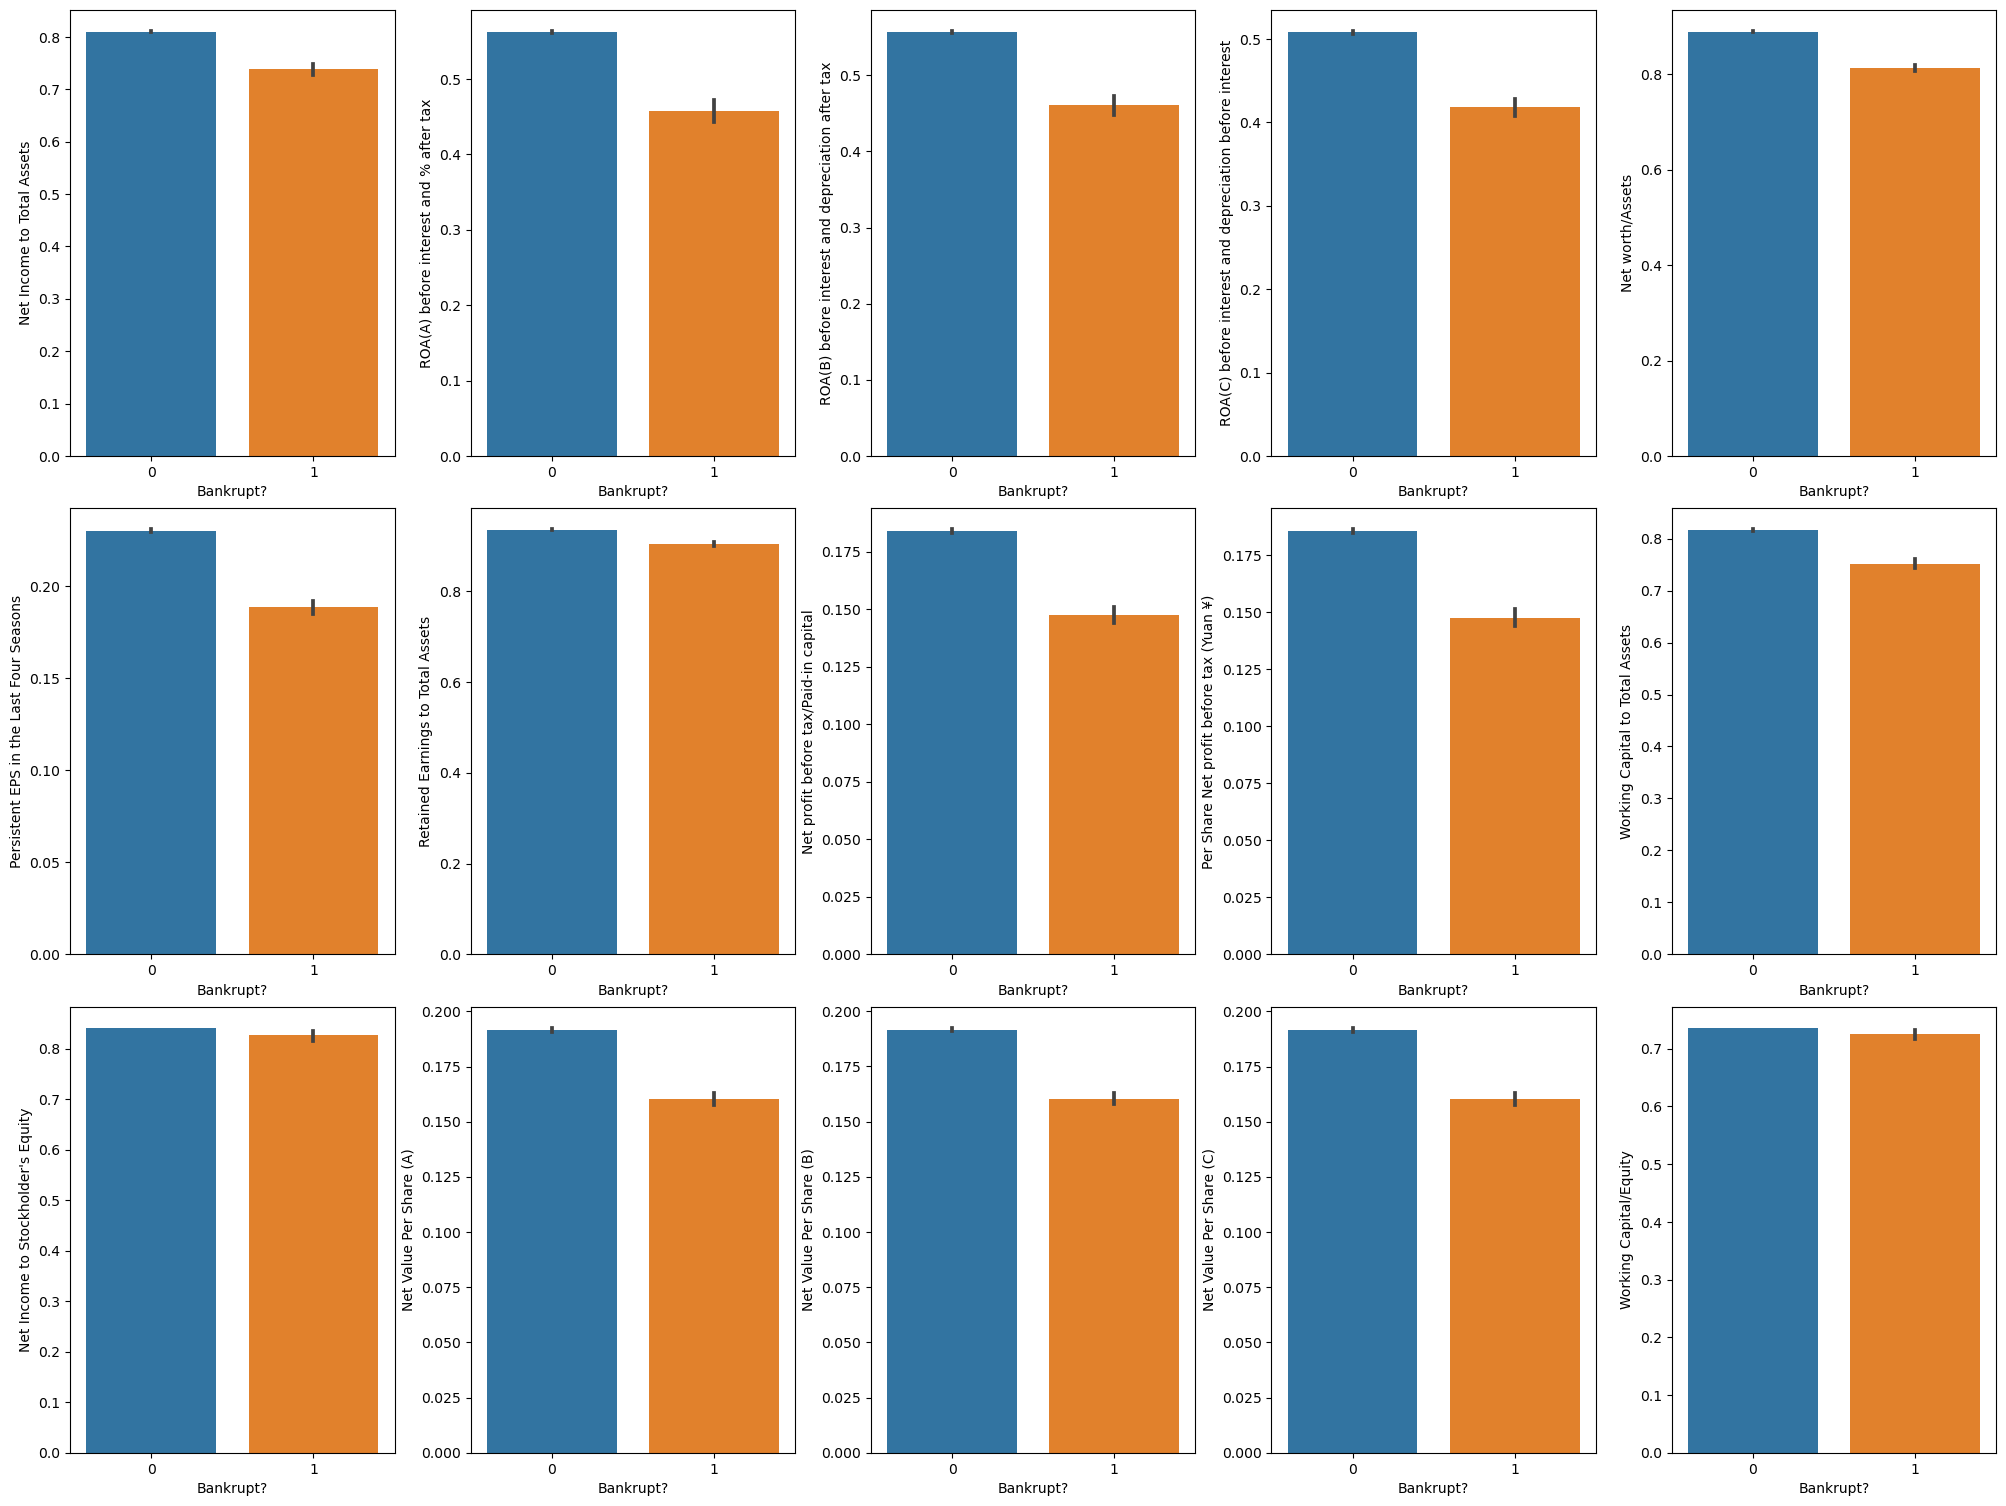

In [159]:
plt.figure(figsize=(20, 15))

for i in range(1, 16):
    plt.subplot(3, 5, i)  
    sns.barplot(x=n_X_value, y=n_y_value[i-1], data=negative_corr)

plt.tight_layout(pad=0.5)

In [160]:
# 타겟 변수와 음의 상관관계가 가장 높은 피처 Top15
n_y_value

['Net Income to Total Assets',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'ROA(C) before interest and depreciation before interest',
 'Net worth/Assets',
 'Persistent EPS in the Last Four Seasons',
 'Retained Earnings to Total Assets',
 'Net profit before tax/Paid-in capital',
 'Per Share Net profit before tax (Yuan ¥)',
 'Working Capital to Total Assets',
 "Net Income to Stockholder's Equity",
 'Net Value Per Share (A)',
 'Net Value Per Share (B)',
 'Net Value Per Share (C)',
 'Working Capital/Equity']

### **<음의 상관관계 시각화 해석>**
- 총 자산에 대한 순이익                                  --> 총 자산에 비해 높은 이익, 경영 성과가 좋은 것을 의미
- 이자 전 ROA(A) 및 세금 후 %: 총 자산 수익률(A)          --> 높은 수익을 창출
- 이자 및 감가상각 전: 총자산수익률(B)                    -->   "
- 이자 전 ROA(C) 및 이자 전 감가 상각: 총 자산 수익률(C)   -->   " 
- 순자산/자산: 자기자본/총자산                            --> 자기자본이 총자산에서 차지하는 비중이 높음
- 지난 4계절의 지속적인 EPS: EPS -순이익                  --> 기업의 주당 순이익, 재무의 건전성
- 총자산에 대한 이익잉여금                                --> 이익을 축적하고 적극적으로 재투자하거나 파산 위험에 대비하는 등의 안정적인 재무 상태
- 세전순이익/납입자본: 세전이익/자본                       --> 자본 대비 높은 수익
- 주당 세전 순이익(Yuan ¥): 주당 세전 이익                 --> 주주들에게 더 많은 이익을 배당할 수 있는 잠재력. 따라서 높은 주당 세전 순이익은 파산 위험을 낮출 수 있음
- 총 운전 자본 자산                                       --> 기업이 운영에 투입한 자본의 총액
- 자기 자본에 대한 순이익                                  --> 기업이 투하한 자본에 대해 더 큰 이익을 창출
- 주당 순가치(A): 주당 장부가치(A)                         --> 주주들에게 높은 수준의 가치를 제공한다는 것
- 주당순가치(B): 장부가 주당 순가치(B)                      --> " 
- 주당 순가치(C): 주당 순가치(C)                           --> " 
- 운전 자본/자본                                          --> 기업이 운영 활동에 필요한 자본을 충분히 보유하고 있다는 것

# **8. target의 분포 및 비율 확인**

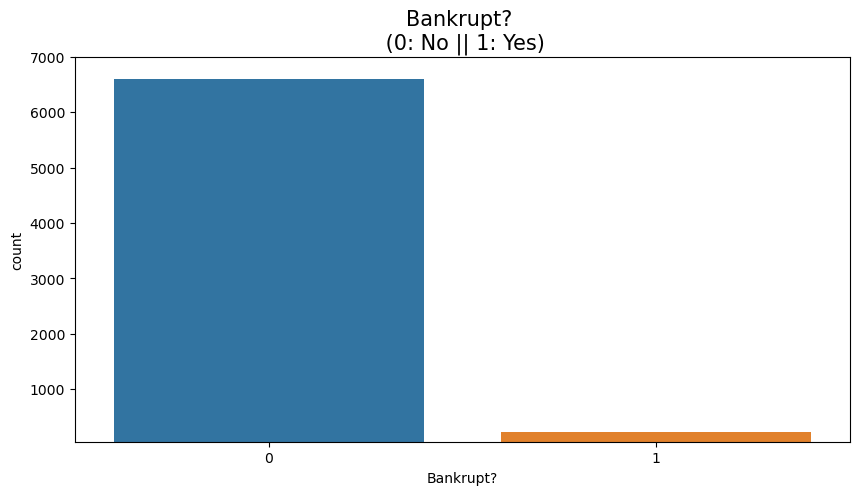

In [169]:
# 데이터 불균형 확인
plt.figure(figsize=(10, 5))
sns.countplot(data=Bankruptcy_org_df, x='Bankrupt?')
plt.ylim(50, 7000)
plt.title('Bankrupt? \n (0: No || 1: Yes)', fontsize=15)

plt.show()

In [170]:
print(Bankruptcy_org_df['Bankrupt?'].value_counts()[0], '건  -> 파산하지 않은 경우 (0)')
print(Bankruptcy_org_df['Bankrupt?'].value_counts()[1], '건  -> 파산한 경우 (1)')

print('-' * 50)

print('Bankrupt? -> No :', round(Bankruptcy_org_df['Bankrupt?'].value_counts()[0] / len(Bankruptcy_org_df) * 100, 2), '%')
print('Bankrupt? -> Yes :', round(Bankruptcy_org_df['Bankrupt?'].value_counts()[1] / len(Bankruptcy_org_df) * 100, 2), '%')

6599 건  -> 파산하지 않은 경우 (0)
220 건  -> 파산한 경우 (1)
--------------------------------------------------
Bankrupt? -> No : 96.77 %
Bankrupt? -> Yes : 3.23 %


- 대부분의 회사들은 재정적으로 안정적임.
- 위 그래프에서 볼 수 있듯이, 타겟 변수가 0(파산하지 않음)에 치우쳐 있기 때문에 oversampling해야함.
- 평가 데이터에 영향을 미치지 않도록 학습 및 평가 데이터를 분리한 후 oversampling 진행하고자 함.

# **9. 시각화 분석 결과 정리**

### **1. <범주형 피처와 타겟 값의 관계>**

    * 부채보다 자산을 많이 보유하고 있음에도 불구하고 조직의 일부가 파산을 겪음
    * 손실을 보고 있던 대부분의 기업들은 사업을 안정화 시켜 파산하지 않았음.


### **2. <연속형 피처와 타겟 값의 관계>**

    1) 파산함 - 양의 상관관계 
    - " 아래 지표가 클 수록 파산할 가능성이 큼"

    * 부채가 총 자산에 비해 큰 비중을 차지할 수록 
    * 기업이 변화에 대응하기 위한 유동 자금을 보유하지 않을 수록 
    * 이자 부채의 상당한 비용을 부담
    * 자기 자본의 비해 높은 부채 
    * 큰 비용 부담
    * 자본 -> 높은 장기 부채
    * 현금으로 유동 부채를 상환 
    * 자본에 비해 재고와 미수금이 큰 비중
    * 우발 부채 비중 

    2) 파산하지 않음 - 음의 상관관계
    - " 아래 지표가 클 수록 파산할 가능성이 낮음"

    * 총 자산 및 자본 대비 높은 수익 창출 
    * 자기자본이 총자산에서 차지하는 비중
    * 기업의 주당 순이익
    * 이익을 축척하고 적극적인 재투자
    * 기업 운영에 투입한 자본의 총액
    * 기업의 주당 순가치 
    * 기업 운영에 필요한 자본을 충분히 보유

# **10. Oversampling - 타겟 불균형 처리**
- 학습 데이터에 대해서만

In [164]:
oversample = SMOTE()
X_train_oversampling, y_train_oversampling = oversample.fit_resample(X_train, y_train)

In [165]:
print('기존 피처의 갯수 : ', X_train.shape)
print('기존 타갯의 갯수 : ', y_train.shape)

print('-' * 50)

print('오버샘플링 후 피처의 갯수 : ', X_train_oversampling.shape)
print('오버샘플링 후 타겟의 갯수 : ', y_train_oversampling.shape)

기존 피처의 갯수 :  (5455, 95)
기존 타갯의 갯수 :  (5455,)
--------------------------------------------------
오버샘플링 후 피처의 갯수 :  (10562, 95)
오버샘플링 후 타겟의 갯수 :  (10562,)


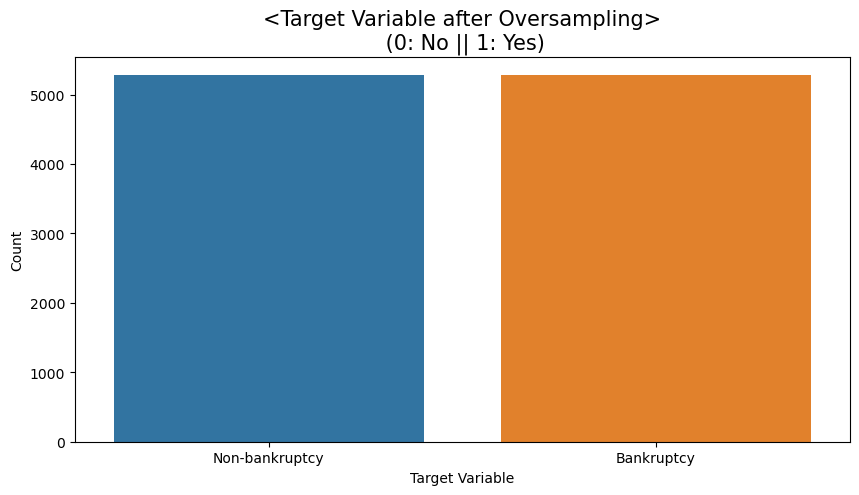

SMOTE 적용 후 레이블(target) 값 분포: 
 0    5281
1    5281
Name: Bankrupt?, dtype: int64


In [166]:
plt.figure(figsize=(10, 5))

sns.countplot(x = y_train_oversampling)

plt.xticks([0, 1], ['Non-bankruptcy', 'Bankruptcy'])
plt.xlabel('Target Variable')
plt.ylabel('Count')

plt.title('<Target Variable after Oversampling>\n (0: No || 1: Yes)', fontsize=15)
plt.show()

print('SMOTE 적용 후 레이블(target) 값 분포: \n', pd.Series(y_train_oversampling).value_counts())

# **11. 머신러닝 전략 수립**

- 1) 분류 알고리즘 :
     - (1) 로지스틱 회귀(Logistic Regression)
     - (2) 결정 트리(Decision Tree)
     - (3) 랜덤포레스트(Random Forest)
     - (4) 그래디언트 부스팅(Gradient Boosting) : XGBoost, LightGBM

- 2) 성능 지표 :
     - (1) 재현율(Recall)
     - (2) ROC-AUC